## Credit Score – opis problemu

Celem projektu jest rozwiązanie problemu wieloklasowej klasyfikacji jakości kredytowej klientów bankowych na podstawie danych finansowych, demograficznych oraz behawioralnych. Zmienna docelowa `Credit_Score` przyjmuje trzy klasy:

- **Poor** – niska wiarygodność kredytowa
- **Standard** – średnia wiarygodność kredytowa
- **Good** – wysoka wiarygodność kredytowa

Problem ten jest typowy dla systemów oceny ryzyka kredytowego (credit scoring) i stanowi podstawę do dalszej analizy eksploracyjnej oraz budowy modeli ML i DL.

## Exploratory Data Analysis (EDA)

Celem eksploracyjnej analizy danych było:
- zapoznanie się ze strukturą zbioru danych,
- analiza rozkładu zmiennej docelowej `Credit_Score`,
- identyfikacja potencjalnych problemów (braki danych, wartości odstające),
- wstępna ocena zależności pomiędzy cechami a oceną kredytową.

Wnioski z EDA stanowią podstawę do kolejnych etapów: preprocessingu danych oraz budowy modeli uczenia maszynowego i głębokiego.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("../data/raw/train.csv")
test_df = pd.read_csv("../data/raw/test.csv")
#https://www.kaggle.com/datasets/parisrohan/credit-score-classification/data

C:\Users\mikol\AppData\Local\Temp\ipykernel_23140\186738303.py:1: DtypeWarning: Columns (0: Monthly_Balance) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv("../data/raw/train.csv")


In [3]:
train_df.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [4]:
train_df.tail(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard
99999,0x25fed,CUS_0x942c,August,Nicks,25,078-73-5990,Mechanic,39628.99_,3359.415833,4,...,Good,502.38,34.192463,31 Years and 10 Months,No,35.104023,167.1638651610451,!@9#%8,393.673696,Poor


In [5]:
train_df.shape

(100000, 28)

Zauważono obecność kolumn identyfikacyjnych oraz zawierających dane wrażliwe (np. `ID`, `Name`, `SSN`), które nie wnoszą informacji predykcyjnej. Ich dalsze przetwarzanie zostanie rozważone na etapie preprocessingu.

Dodatkowo zaobserwowano brakujące oraz potencjalnie nieprawidłowe dane w części kolumn. Zbiór danych zawiera 100 000 obserwacji i 28 cech.

In [6]:
train_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  str    
 1   Customer_ID               100000 non-null  str    
 2   Month                     100000 non-null  str    
 3   Name                      90015 non-null   str    
 4   Age                       100000 non-null  str    
 5   SSN                       100000 non-null  str    
 6   Occupation                100000 non-null  str    
 7   Annual_Income             100000 non-null  str    
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  str    
 13  Type_of_Loan              88592 non-null   str    
 14  

Kolumna `Monthly_Balance` jest typu object co sugeruje błędne dane. Widać również, że niektóre dane liczbowe są zapisywane w postaci tekstowej.

In [8]:
missing = train_df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]

Monthly_Inhand_Salary      15002
Type_of_Loan               11408
Name                        9985
Credit_History_Age          9030
Num_of_Delayed_Payment      7002
Amount_invested_monthly     4479
Num_Credit_Inquiries        1965
Monthly_Balance             1200
dtype: int64

W niektórych kolumnach występuje znaczna liczba brakujących wartości, co będzie wymagało odpowiedniego podejścia podczas etapu preprocessingu.

In [10]:
numeric_df = train_df.select_dtypes(include='number')
numeric_df.corr()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
Monthly_Inhand_Salary,1.000000,-0.010819,-0.005049,-0.006422,-0.250100,-0.008867,0.173192,0.007264
Num_Bank_Accounts,-0.010819,1.000000,-0.002216,-0.003998,0.015966,-0.001683,-0.001365,-0.001433
Num_Credit_Card,-0.005049,-0.002216,1.000000,-0.004012,0.008715,-0.003479,-0.003341,0.000768
Interest_Rate,-0.006422,-0.003998,-0.004012,1.000000,0.009792,-0.001681,-0.000359,0.002517
Delay_from_due_date,-0.250100,0.015966,0.008715,0.009792,1.000000,0.011508,-0.063796,-0.003889
Num_Credit_Inquiries,-0.008867,-0.001683,-0.003479,-0.001681,0.011508,1.000000,0.000145,-0.007031
Credit_Utilization_Ratio,0.173192,-0.001365,-0.003341,-0.000359,-0.063796,0.000145,1.000000,0.001389
Total_EMI_per_month,0.007264,-0.001433,0.000768,0.002517,-0.003889,-0.007031,0.001389,1.000000


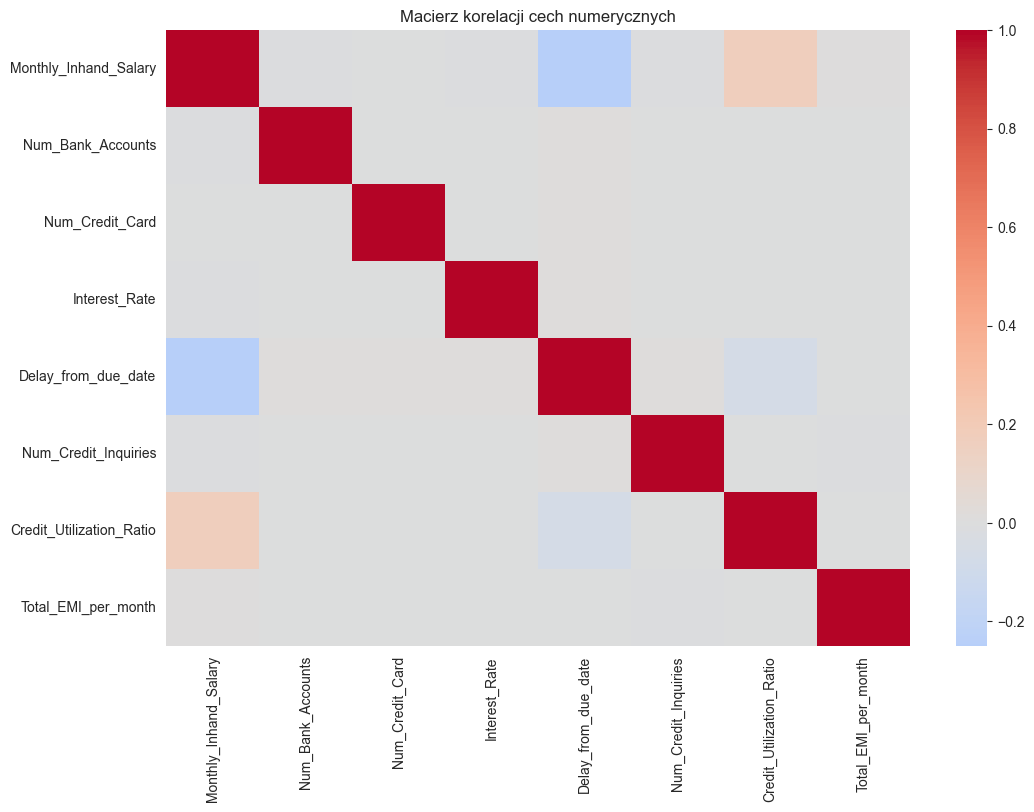

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(),cmap='coolwarm',center=0)
plt.title("Macierz korelacji cech numerycznych")
plt.show()


Macierz skorelowanych cech do lepszego zrozumienia danych. Większość par zmiennych charakteryzuje się niską korelacją, co sugeruje brak silnej współliniowości między cechami.

Najbardziej zauważalne zależności to:
- umiarkowana ujemna korelacja pomiędzy `Delay_from_due_date` a `Monthly_Inhand_Salary`,
- słaba dodatnia korelacja pomiędzy `Credit_Utilization_Ratio` a poziomem dochodów.

Ze względu na fakt, że część cech liczbowych w zbiorze danych jest zapisana jako tekst,
analiza korelacji została ograniczona wyłącznie do kolumn o typie numerycznym.

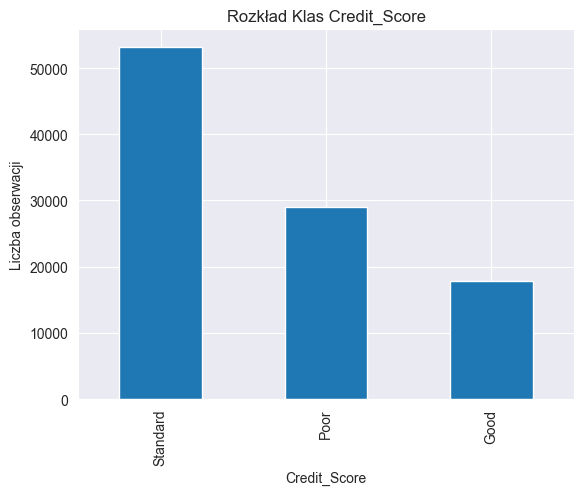

In [12]:
train_df['Credit_Score'].value_counts().plot(kind='bar')
plt.title("Rozkład Klas Credit_Score")
plt.ylabel("Liczba obserwacji")
plt.show()

Zmienna docelowa charakteryzuje się niezbalansowanym rozkładem klas, co może mieć istotny wpływ na proces uczenia modeli i dobór metryk ewaluacyjnych.

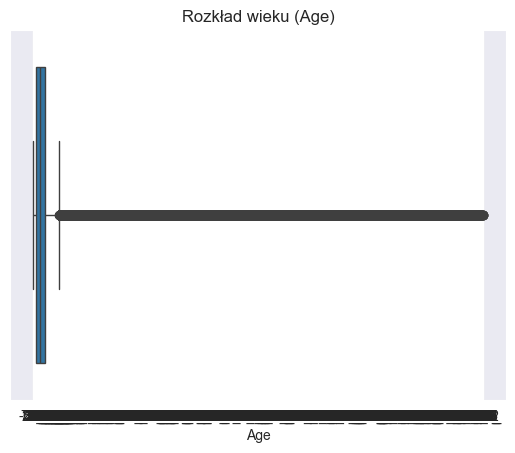

In [13]:
sns.boxplot(x=train_df['Age'])
plt.title("Rozkład wieku (Age)")~~~~~~~~
plt.show()

Wykres jest silnie rozciągnięty ze względu na obecność ekstremalnych wartości odstających. Dodatkowo zmienna `Age` jest zapisana jako tekst, co może wpływać na poprawność wizualizacji oraz dalszej analizy.

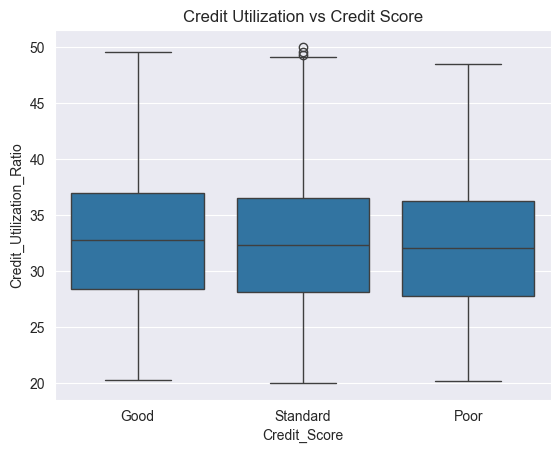

In [15]:
sns.boxplot(
    x='Credit_Score',
    y='Credit_Utilization_Ratio',
    data=train_df
)
plt.title("Credit Utilization vs Credit Score")
plt.show()

 Credit Utilization Ratio a Credit Score

Rozkłady dla poszczególnych klas są do siebie zbliżone,
co sugeruje, że sama zmienna `Credit_Utilization_Ratio`
nie jest wystarczająca do jednoznacznego rozróżnienia klas.

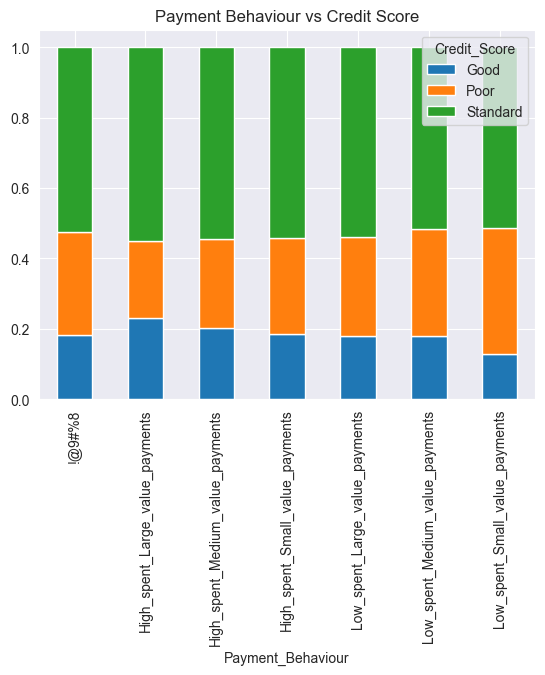

In [16]:
pd.crosstab(
    train_df['Payment_Behaviour'],
    train_df['Credit_Score'],
    normalize='index'
).plot(kind='bar',stacked=True)
plt.title("Payment Behaviour vs Credit Score")
plt.show()


Payment Behaviour a Credit Score

Można zauważyć, że w niektórych kategoriach zachowań płatniczych
udział klasy `Poor` jest wyższy niż w innych,
co sugeruje potencjalną zależność pomiędzy sposobem realizacji płatności
a oceną kredytową klienta.

Sugeruje to, że zmienne behawioralne mogą odgrywać istotną rolę w procesie predykcji i powinny zostać uwzględnione w modelach.

## Podsumowanie EDA

Na podstawie przeprowadzonej analizy eksploracyjnej zidentyfikowano:
- obecność brakujących oraz nieprawidłowo zapisanych danych,
- cechy zapisane w nieodpowiednich typach (liczby jako tekst),
- niezbalansowany rozkład zmiennej docelowej,
- potencjalne zależności pomiędzy zmiennymi behawioralnymi a oceną kredytową.

Wnioski te zostaną wykorzystane w kolejnym etapie projektu, obejmującym preprocessing danych.